In [1]:
import pandas as pd
import numpy as np
import numpy
import new_extractor as ext
import os

In [6]:
def readExecutionData(num_experiences, framework, device, benchmark, benchmark_path):
    executions = []
    for execution_counter in range(1, num_experiences + 1):
        memory_path = os.path.join(benchmark_path, f"meminfo-{execution_counter}.txt")
        try:
            memory_data = ext.get_memory(memory_path)
        except FileNotFoundError:
            memory_data = [numpy.NaN] * 4

        energy_path = os.path.join(benchmark_path, f"batterystats-{execution_counter}.txt")
        try:
            voltage = ext.get_voltage(energy_path)
            app_id = ext.get_appid(energy_path)

            energy = ext.get_energy(energy_path, app_id, voltage)
            time_data = ext.get_time(energy_path, app_id)
        except FileNotFoundError:
            energy = numpy.NaN
            time_data = [numpy.NaN] * 2
        
        data_path = os.path.join(benchmark_path, f"procstats-{execution_counter}.txt")
        try:
            package = ext.get_package(energy_path)
            proc_data = ext.get_data(data_path, package)
        except FileNotFoundError:
            proc_data = [numpy.NaN] * 3
            package = None

        frame_path = os.path.join(benchmark_path, f"gfxinfo-{execution_counter}.txt")
        try:
            pass
        except FileNotFoundError:
            pass
        
        executions.append([framework, device, benchmark, execution_counter, *memory_data, *proc_data, energy, *time_data])
    return executions

def getDataFrame(benchmarks):
    return pd.DataFrame(benchmarks, columns=['framework', 'device', 'benchmark', 'execution', 'memory', 'heap_free', 'heap_alloc', 'heap_size', 'mem_data_low', 'mem_data_med', 'mem_data_high', 'energy', 'foreground_time', 'cpu_time'])

unique = lambda x: list(set(x))
    

<h1>Data - Exp</h1>

In [17]:
num_experiences = 45
experiment_relative_path = 'experiment-results-exp'
benchmarks = ext.readExperimentResult(experiment_relative_path, num_experiences , readExecutionData)
full_df = getDataFrame(benchmarks)
full_df = full_df.drop(full_df[full_df['execution'] <= 15].index)
full_df

,framework,device,benchmark,execution,memory,heap_free,heap_alloc,heap_size,mem_data_low,mem_data_med,mem_data_high,energy,foreground_time,cpu_time
15,C#,SM-G781B,rotation-112-8,16,126.608,7.756,30.995,38.752,124.0,124.0,124.0,3.894458,20.848,11.603
16,C#,SM-G781B,rotation-112-8,17,126.418,7.714,31.037,38.752,123.0,123.0,123.0,3.732772,20.815,11.243
17,C#,SM-G781B,rotation-112-8,18,126.294,7.650,31.117,38.768,123.0,123.0,123.0,3.824939,20.885,11.611
18,C#,SM-G781B,rotation-112-8,19,121.962,8.454,31.162,39.617,119.0,119.0,119.0,3.717410,20.809,10.527
19,C#,SM-G781B,rotation-112-8,20,126.416,7.868,31.200,39.069,123.0,123.0,123.0,3.947828,20.798,12.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,REACT,SM-G781B,rotation-448-16,41,201.649,14.467,55.393,69.861,197.0,197.0,197.0,11.568762,23.326,20.190
896,REACT,SM-G781B,rotation-448-16,42,208.112,14.603,55.432,70.036,203.0,203.0,203.0,11.526178,23.397,20.678
897,REACT,SM-G781B,rotation-448-16,43,211.571,14.746,55.344,70.091,207.0,207.0,207.0,11.776608,23.464,20.555
898,REACT,SM-G781B,rotation-448-16,44,204.825,14.714,55.434,70.149,200.0,200.0,200.0,11.799612,23.385,20.506


In [19]:
device = "SM-G781B"
benchmarks = unique(full_df["benchmark"].tolist())
result = []
for benchmark in benchmarks:
    benchmark_df = full_df.loc[ (full_df['benchmark'] == benchmark) & (full_df['device'] == device)]
    for framework in unique(benchmark_df['framework']):
        framework_df = benchmark_df.loc[benchmark_df['framework'] == framework]
        foregroundTime = framework_df['foreground_time'].mean()
        cpu_time = framework_df['cpu_time'].mean()
        memory = framework_df['memory'].mean()
        energy = framework_df['energy'].mean()
        result.append([benchmark, framework, foregroundTime, cpu_time, memory, energy])
mean_df = pd.DataFrame(result, columns=["benchmark", "framework", "foreground_time", "cpu_time", "memory", "energy"])
mean_df

,benchmark,framework,foreground_time,cpu_time,memory,energy
0,rotation-28-4,REACT,22.868600,5.765233,136.338767,2.479560
1,rotation-28-4,IONIC,22.708700,11.767933,114.507433,5.605979
2,rotation-28-4,C#,20.756400,5.239333,119.545433,2.278341
3,rotation-28-4,JAVA,22.696800,3.597267,79.508933,1.224563
4,rotation-28-4,FLUTTER,22.444467,5.394533,90.376500,1.822318
5,rotation-448-16,REACT,23.379400,20.434567,209.171433,11.806605
6,rotation-448-16,IONIC,22.715067,21.755033,130.052467,21.555287
7,rotation-448-16,C#,20.995733,18.885600,132.199033,7.087853
8,rotation-448-16,JAVA,22.761833,13.940567,86.053933,3.703298
9,rotation-448-16,FLUTTER,22.423067,19.339667,93.562733,11.493195


In [21]:
import seaborn as sns
sns.set_theme(style="whitegrid")

c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


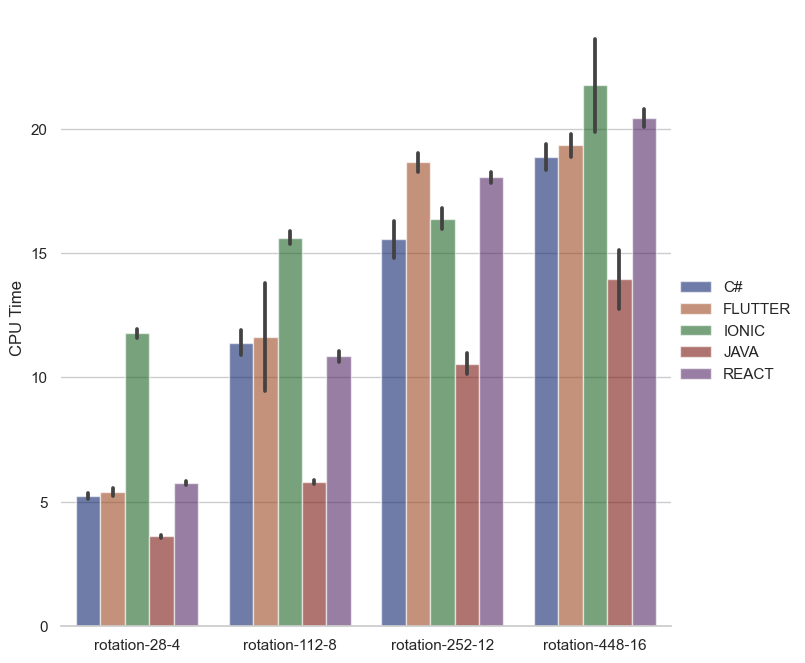

In [33]:
rotation_28_df = full_df.loc[full_df['benchmark'] == "rotation-28-4"]
g = sns.catplot(
    data=full_df, 
    kind="bar",
    x="benchmark", 
    y="cpu_time", 
    hue="framework",
    errorbar="sd", 
    palette="dark",
    order=['rotation-28-4','rotation-112-8','rotation-252-12', 'rotation-448-16'],
    alpha=.6, 
    height=7
)
g.despine(left=True)
g.set_axis_labels("", "CPU Time")
g.legend.set_title("")
